In [1]:
from mrsimulator import Simulator, SpinSystem, Site, Dimension
from mrsimulator import SymmetricTensor as st
from mrsimulator.methods import one_d_spectrum

In [2]:
import matplotlib.pyplot as plt
def plot(x, y):
    plt.figure(figsize=(4.5, 2.5))
    plt.plot(x, y, linewidth=1)
    plt.xlim([x.value.max(), x.value.min()])
    plt.xlabel(f"frequency ratio / {str(x.unit)}")
    plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.25)
    plt.tight_layout(h_pad=0, w_pad=0, pad=0)

# Coesite

Coesite is a high-pressure (2-3 GPa) and high-temperature (700°C) polymorph of silicon dioxide SiO$_2$. Coesite has five distinct $^{17}$O sites. We use the $^{17}$O tensor information from [Grandinetti et. al.](https://pubs.acs.org/doi/abs/10.1021/j100032a045)

**Step 1** Create sites.

In [3]:
O17_1 = Site(name='O1', isotope='17O', isotropic_chemical_shift=29, quadrupolar=st(Cq=6.05e6, eta=0.000))
O17_2 = Site(name='O2', isotope='17O', isotropic_chemical_shift=41, quadrupolar=st(Cq=5.43e6, eta=0.166))
O17_3 = Site(name='O3', isotope='17O', isotropic_chemical_shift=57, quadrupolar=st(Cq=5.45e6, eta=0.168))
O17_4 = Site(name='O4', isotope='17O', isotropic_chemical_shift=53, quadrupolar=st(Cq=5.52e6, eta=0.169))
O17_5 = Site(name='O5', isotope='17O', isotropic_chemical_shift=58, quadrupolar=st(Cq=5.16e6, eta=0.292))

**Step 2** Create spin systems using the sites.

In [4]:
sites = [O17_1, O17_2, O17_3, O17_4, O17_5]
abundance = [0.83, 1.05, 2.16, 2.05, 1.90] # abundance of each isotopomer
spin_systems = [SpinSystem(sites=[s], abundance=a) for s, a in zip(sites, abundance)]

**Step 3** Create a dimension.

In [5]:
dimension = Dimension(
    isotope='17O',
    number_of_points=2046,
    spectral_width=50000, # in Hz
    rotor_frequency=14000, # in Hz
)

The above dimension is set up to record the $^{17}$O resonances at the magic angle, spinning at 14 kHz at 9.4 T external magnetic flux density. The resonances are recorded over 50 kHz using 2046 points. You may also request a full description of the dimension object using the `to_dict_with_units()` method.

In [6]:
dimension.to_dict_with_units()

{'number_of_points': 2046,
 'spectral_width': '50000.0 Hz',
 'reference_offset': '0 Hz',
 'magnetic_flux_density': '9.4 T',
 'rotor_frequency': '14000.0 Hz',
 'rotor_angle': '0.9553166 rad',
 'isotope': '17O',
 'label': ''}

**Step 4** Create the Simulator object and add dimension and isotopomer objects.

In [7]:
sim_coesite = Simulator()
sim_coesite.spin_systems += spin_systems
sim_coesite.dimensions += [dimension]

**Step 5** Simulate and plot.

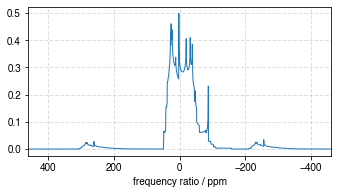

In [8]:
x, y = sim_coesite.run(method=one_d_spectrum)
plot(x,y)
plt.show()